In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 타입 및 특징 기본정보 확인

In [2]:
df = pd.read_csv("./data/ybigta_sdss_train.csv")
df.head(5)

id type  fiberID  psfMag_u  psfMag_g  psfMag_r  psfMag_i  psfMag_z  \
0   415567  QSO      106  19.20636  18.83202  18.79017  18.36788  18.32136   
1   733874  QSO      492  18.85419  18.60349  18.48284  18.36558  18.41101   
2  1009150  QSO      388  19.81733  18.67198  18.46566  18.33873  18.31073   
3   803041  QSO      531  21.77330  20.19641  20.08064  20.11380  19.83673   
4   432241  QSO      180  22.53572  20.07427  19.23110  18.94043  18.65541   

   fiberMag_u  fiberMag_g  ...  petroMag_u  petroMag_g  petroMag_r  \
0    19.33958    18.72630  ...    18.06469    17.18273    16.74307   
1    19.17574    18.90761  ...    18.90764    18.64323    18.49622   
2    20.17311    19.00520  ...    19.85916    18.70682    18.51968   
3    22.16908    20.56249  ...    21.38145    20.22594    20.13081   
4    22.82620    20.41057  ...    22.09349    20.14050    19.25699   

   petroMag_i  petroMag_z  modelMag_u  modelMag_g  modelMag_r  modelMag_i  \
0    16.39772    16.28030    17.60089    16.82960    16.46197    16.09962   
1    18.38058    18.47802    18.84907    18.59603    18.46161    18.34665   
2    18.37718    18.37598    19.81720    18.66244    18.45800    18.32918   
3    20.15601    20.04247    21.76902    20.18548    20.07931    20.10771   
4    18.98682    18.63438    22.58755    20.07051    19.21149    18.90649   

   modelMag_z  
0    16.01179  
1    18.40146  
2    18.31313  
3    19.85110  
4    18.63881  

[5 rows x 23 columns]

In [3]:
print("Columns : ", df.columns,"\n\n")
features = df.columns[2:]
feature_group = ['psfMag', 'fiberMag', 'petroMag', 'modelMag',]
types = df['type'].unique()
print("Types of orb : ", df['type'].unique())
# df['type'].value_counts()
# sns.countplot(y='type', data=df)

Columns :  Index(['id', 'type', 'fiberID', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i',
       'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z'],
      dtype='object') 


Types of orb :  ['QSO' 'STAR_RED_DWARF' 'SERENDIPITY_BLUE' 'STAR_BHB' 'STAR_CATY_VAR'
 'SERENDIPITY_DISTANT' 'GALAXY' 'SPECTROPHOTO_STD' 'REDDEN_STD' 'ROSAT_D'
 'STAR_WHITE_DWARF' 'SERENDIPITY_RED' 'STAR_CARBON' 'SERENDIPITY_FIRST'
 'STAR_BROWN_DWARF' 'STAR_SUB_DWARF' 'SKY' 'SERENDIPITY_MANUAL' 'STAR_PN']


In [4]:
df[features].describe()

fiberID       psfMag_u       psfMag_g       psfMag_r  \
count  171965.000000  171965.000000  171965.000000  171965.000000   
mean      322.563917      20.464397      19.364204      18.778974   
std       187.213484       1.921486       1.691965       1.460107   
min         1.000000      11.379840      11.696430      11.805430   
25%       159.000000      19.177930      18.366400      17.850140   
50%       324.000000      20.269800      19.377400      18.908610   
75%       486.000000      21.617610      20.236870      19.778340   
max       640.000000      25.944000      25.176120      24.979760   

            psfMag_i       psfMag_z     fiberMag_u     fiberMag_g  \
count  171965.000000  171965.000000  171965.000000  171965.000000   
mean       18.390808      18.155136      20.673338      19.585754   
std         1.339582       1.368870       1.825775       1.657664   
min        11.462520      11.711860      12.966360      13.001670   
25%        17.525650      17.256760      19.486500      18.622110   
50%        18.570900      18.235070      20.513500      19.574610   
75%        19.350480      19.136810      21.716440      20.430650   
max        24.994790      23.990730      30.417440      26.511600   

          fiberMag_r     fiberMag_i  ...     petroMag_u     petroMag_g  \
count  171965.000000  171965.000000  ...  171965.000000  171965.000000   
mean       18.984942      18.591067  ...      20.158772      19.045068   
std         1.435600       1.311775  ...       1.990583       1.780224   
min        13.083110      13.020170  ...      11.374970      11.695940   
25%        18.079710      17.709010  ...      18.942250      17.903830   
50%        19.025200      18.669690  ...      19.806650      18.910030   
75%        19.978340      19.553180  ...      20.924030      20.041450   
max        26.142840      26.932700  ...      37.214780      34.223050   

          petroMag_r     petroMag_i     petroMag_z     modelMag_u  \
count  171965.000000  171965.000000  171965.000000  171965.000000   
mean       18.437235      18.049552      17.853120      20.145758   
std         1.578228       1.473435       1.536486       1.942143   
min        10.897270      10.479610      10.275580      11.575430   
25%        17.319410      16.906760      16.680980      18.916770   
50%        18.331630      18.039660      17.793630      19.794570   
75%        19.582080      19.195460      18.994740      20.954740   
max        30.819240      35.290150      32.313430      24.999860   

          modelMag_g     modelMag_r     modelMag_i     modelMag_z  
count  171965.000000  171965.000000  171965.000000  171965.000000  
mean       18.983877      18.381280      17.985598      17.765493  
std         1.734956       1.564029       1.461229       1.510763  
min        11.742010      11.100220      10.640790      10.381840  
25%        17.856870      17.260360      16.832650      16.585120  
50%        18.865580      18.290120      17.988860      17.727870  
75%        19.998280      19.538680      19.138230      18.944650  
max        24.997940      24.994230      24.934550      24.818560  

[8 rows x 21 columns]

In [7]:
df.groupby(["fiberID"]).size().describe()

count    640.000000
mean     268.695312
std       20.968849
min      215.000000
25%      255.000000
50%      268.000000
75%      282.000000
max      335.000000
dtype: float64

##  히스토그램을 이용한 type 간의 분포 확인

Text(0.5, 0, 'Frequency [%]')

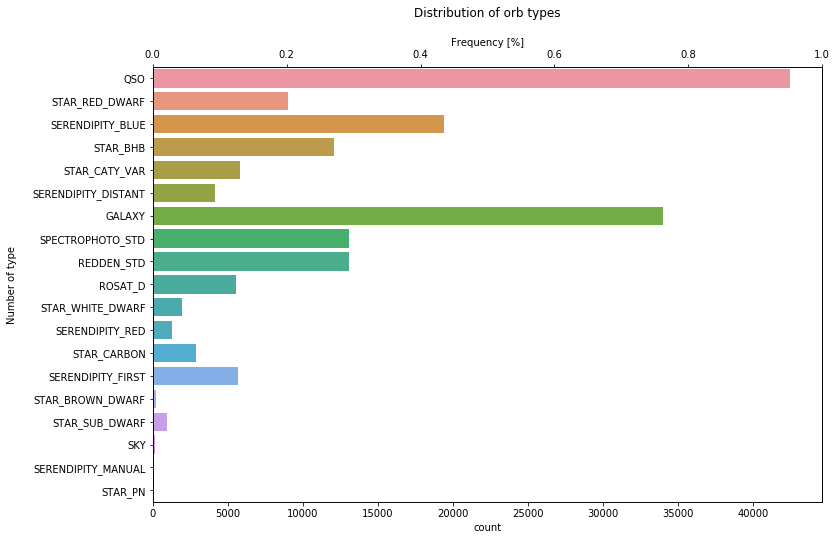

In [9]:
plt.figure(figsize=(12,8))
ax = sns.countplot(y="type", data=df)
plt.title('Distribution of orb types\n')
plt.ylabel('Number of type\n')

# Make twin axis
ax2=ax.twiny()

# Switch so count axis is on right, frequency on left
ax2.xaxis.tick_top()
ax.xaxis.tick_bottom()

# Also switch the labels over
ax.xaxis.set_label_position('bottom')
ax2.xaxis.set_label_position('top')

ax2.set_xlabel('Frequency [%]')

### 관측기준 사이에서 빛의 종류에 따른 차이를 확인하기 위해 box plot을 그려보았다

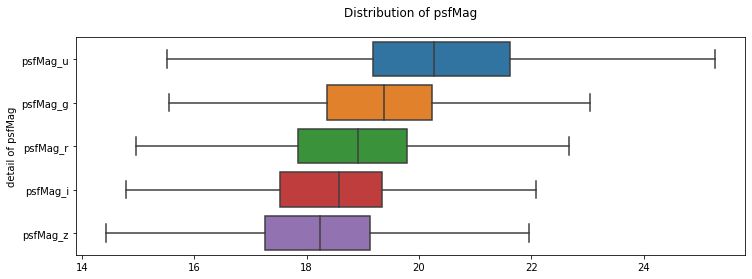

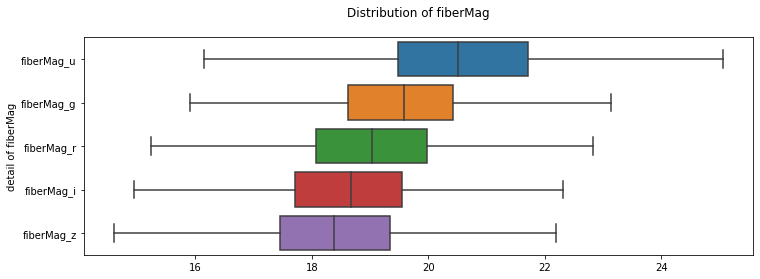

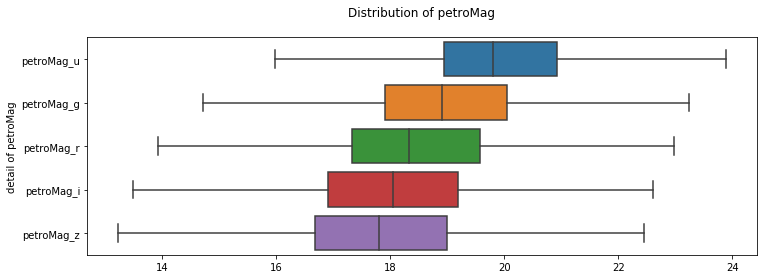

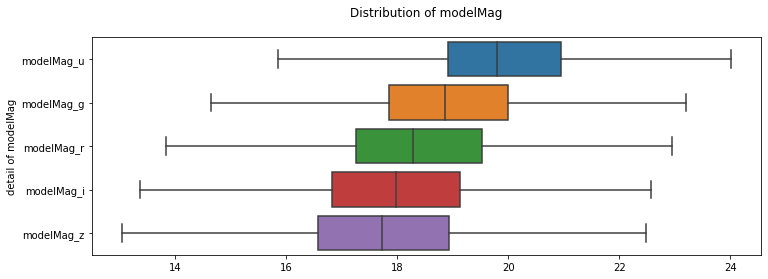

In [10]:

for fg in feature_group :
    plt.figure(figsize=(12,4))
    temp = []
    for i in [x for x in features if fg in x]:
        temp.append(i)
    data = df[temp]
    sns.boxplot(data = data, orient = 'h', showfliers = False)
    plt.title('Distribution of %s\n'%fg)
    plt.ylabel('detail of %s'%fg)

### 각 특징들의 분포정도를 확인하기 위해 distplot 확인

21


C:\Users\ahn18\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


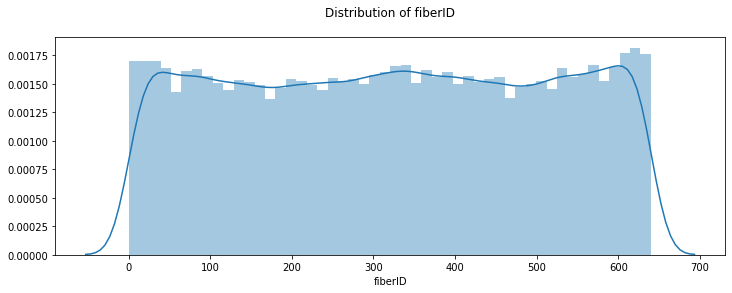

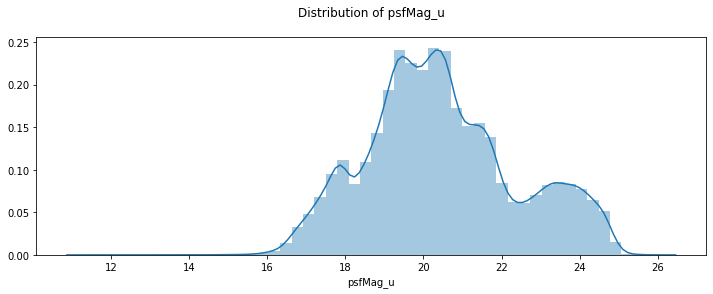

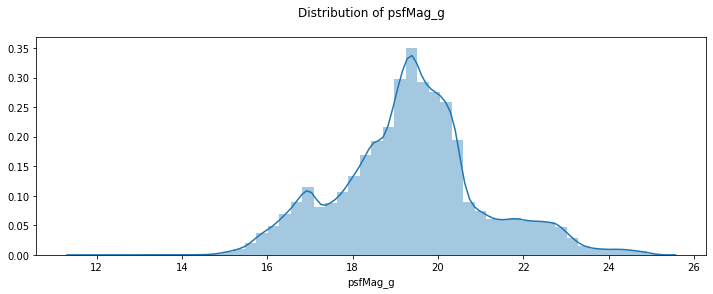

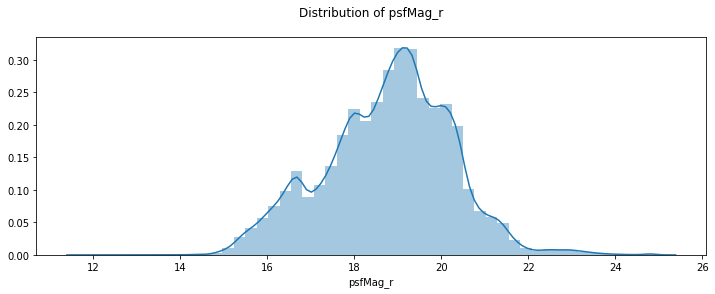

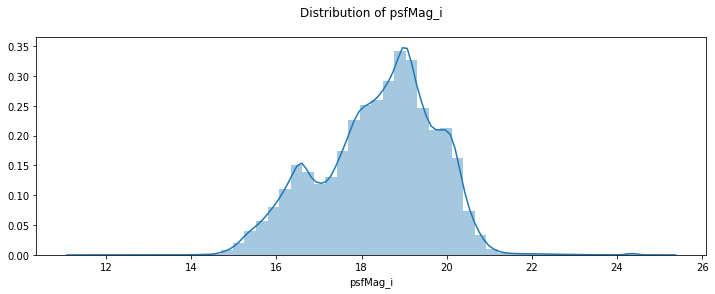

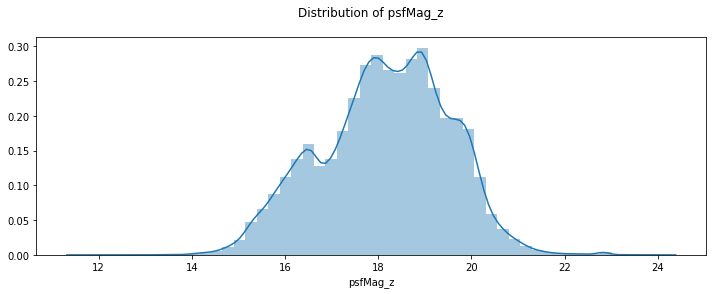

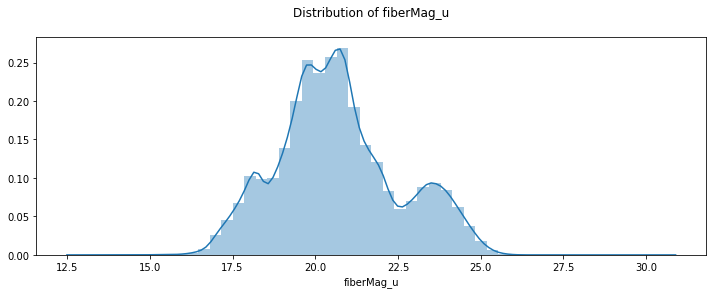

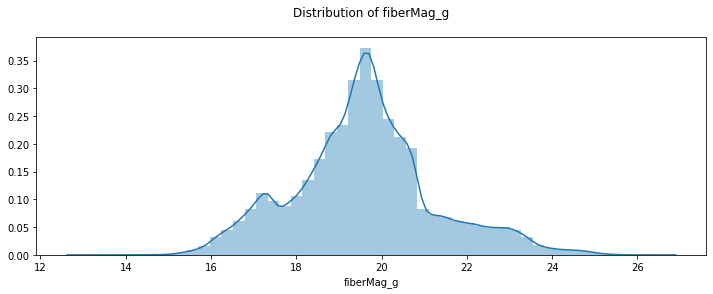

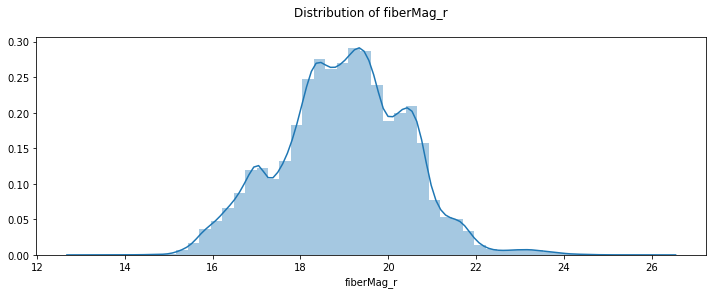

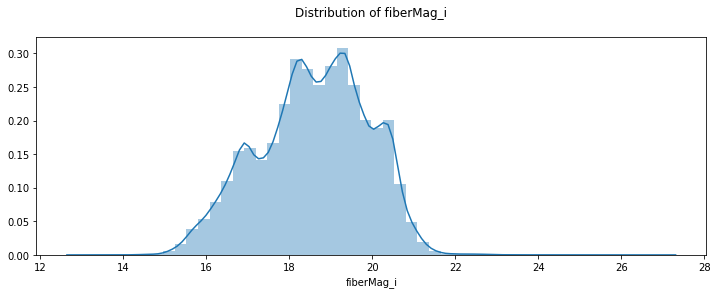

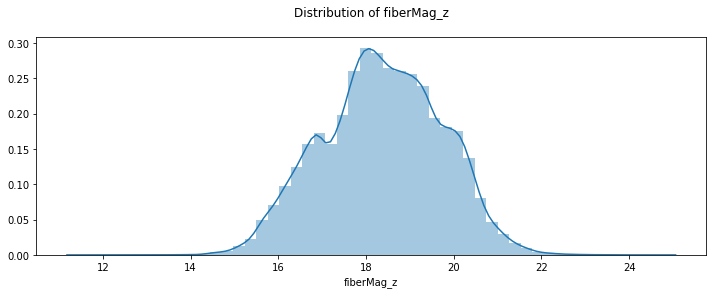

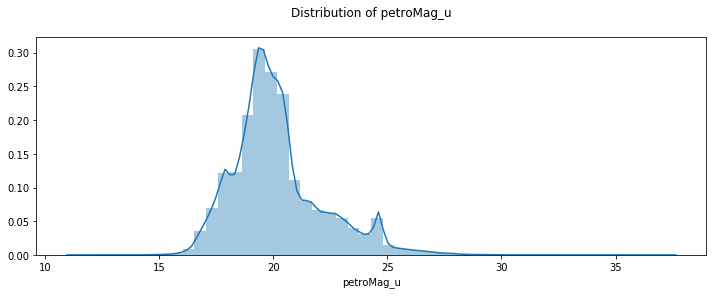

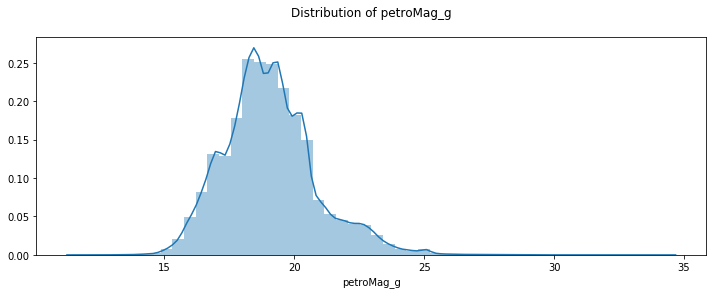

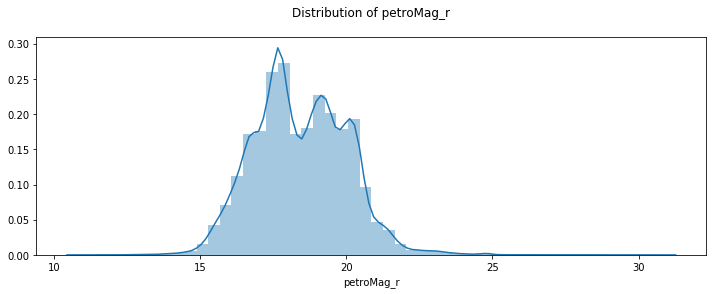

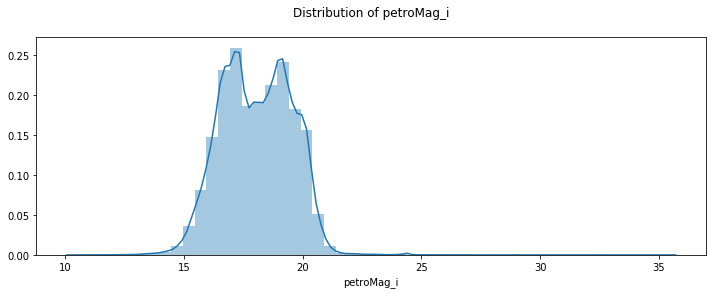

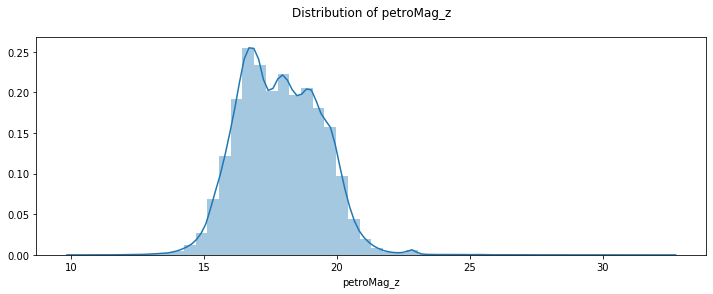

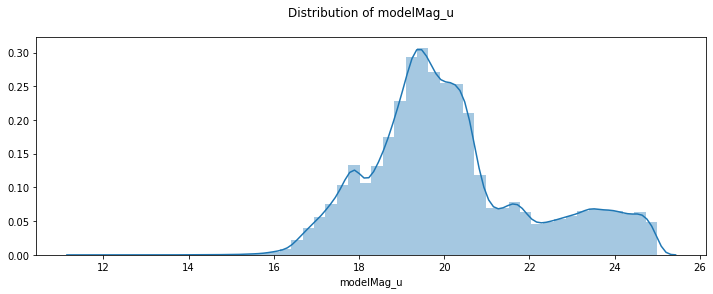

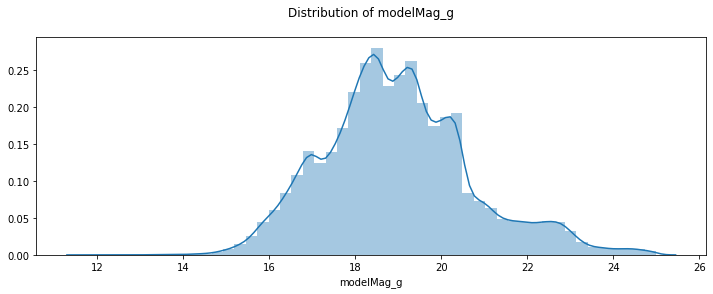

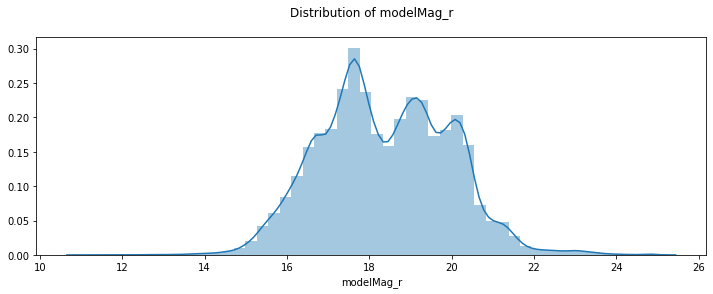

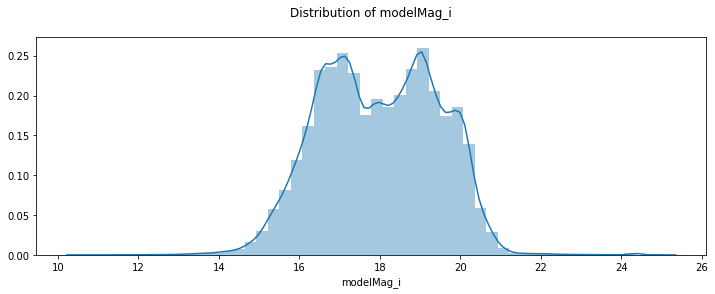

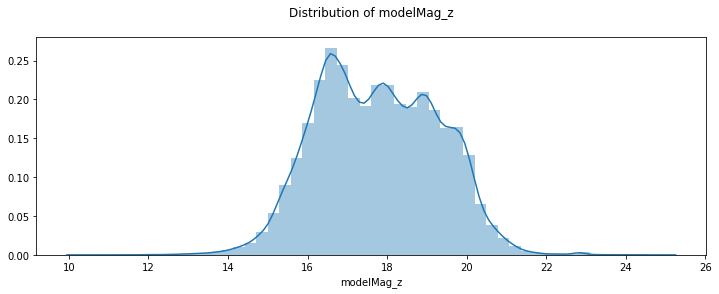

In [11]:
print(len(features))
for col in features :
    plt.figure(figsize=(12,4))
    sns.distplot(df[col])
    plt.title('Distribution of %s\n'%col)

분포 확인 결과
1. 대부분의 특징이 정규분포형태로서 정규성을 띄고 있음
2. 몇몇 특징들의 두개이상의 분산을 가지고 있음
3. 간혹 한쪽으로 치우쳐저 있는 특징들이 있지만 학습에 심각한 정도는 아니라고 판단

### 변수들간의 상관관계를 확인하기 위한 heatmap 작성

(22.0, 0.0)

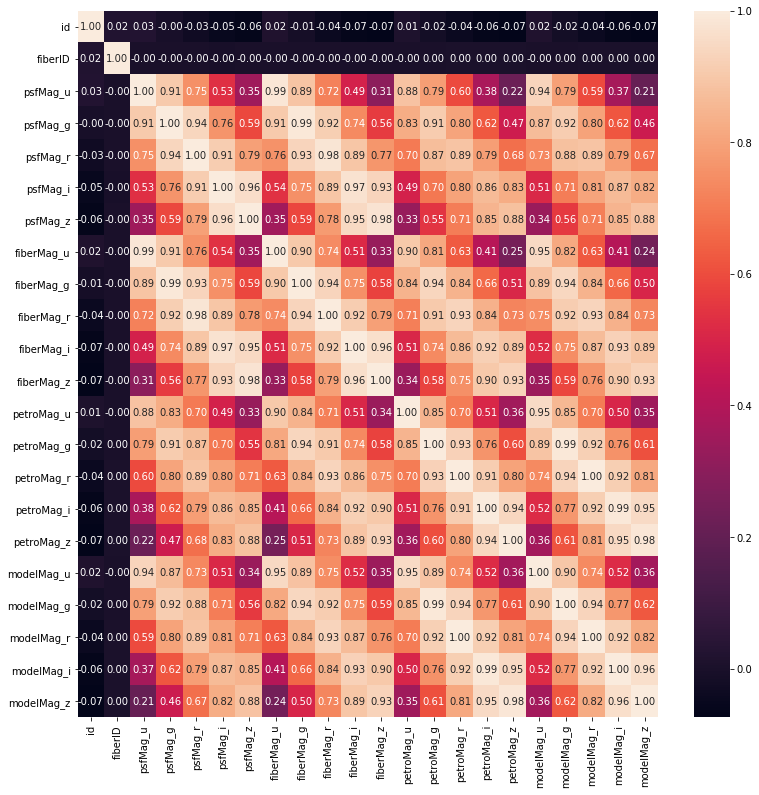

In [14]:
plt.subplots(figsize=(13,13))

ax = sns.heatmap(data=df.corr(),annot=True,fmt='.2f')
buttom,top = ax.get_ylim()
ax.set_ylim(buttom+0.5,top-0.5)



결과 
1. fiber id 는 광섬유의 종류가 아닌 단순히 섬유소의 아이디일뿐 다른 변수들과의 상관관계가 전혀없다는 것을 알 수 있다.
2. 같은 기준의 관측값보다는 같은 종류의 빛들간의 상관관계가 높게 나왔다. 

### 천체타입별 변수들간의 상관관계 확인 

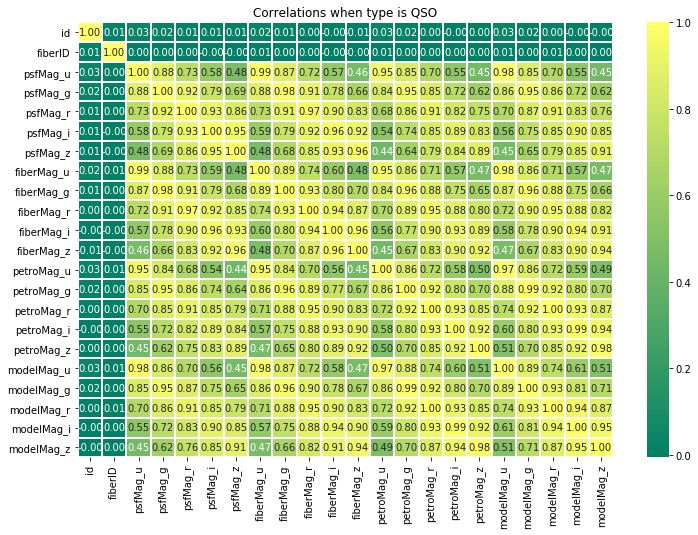

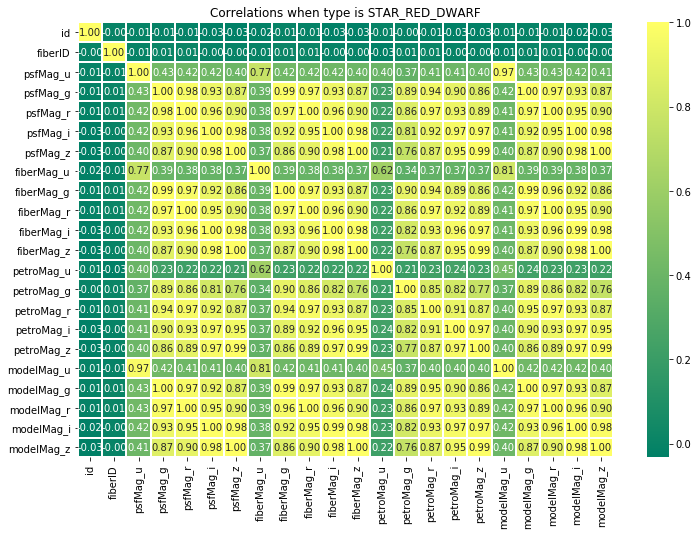

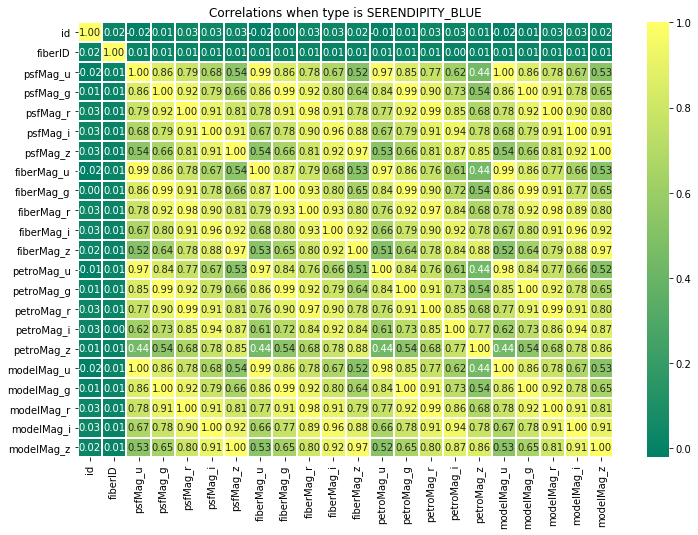

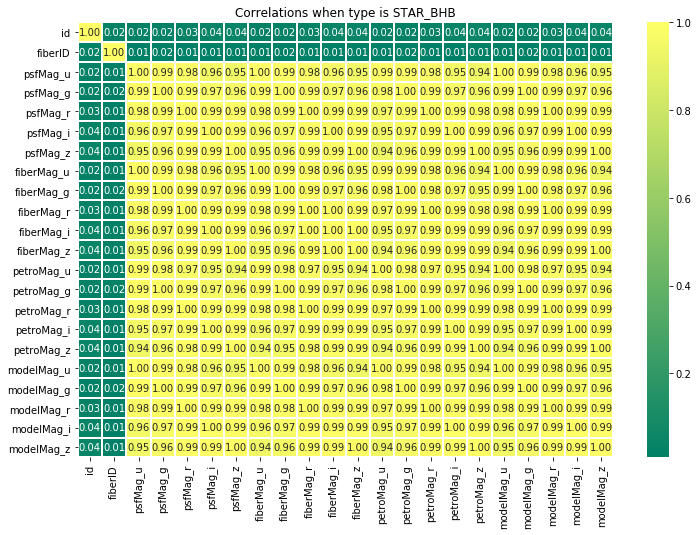

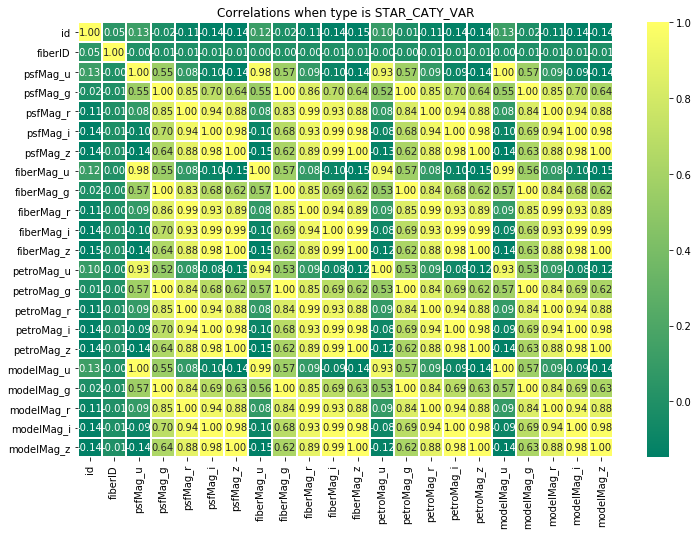

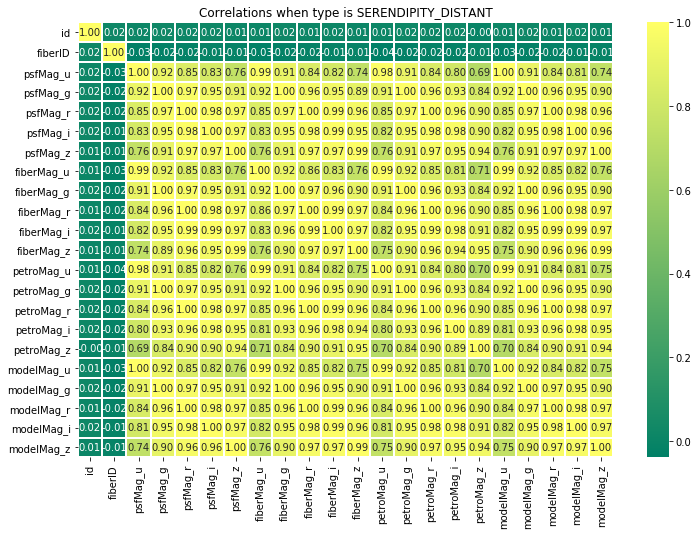

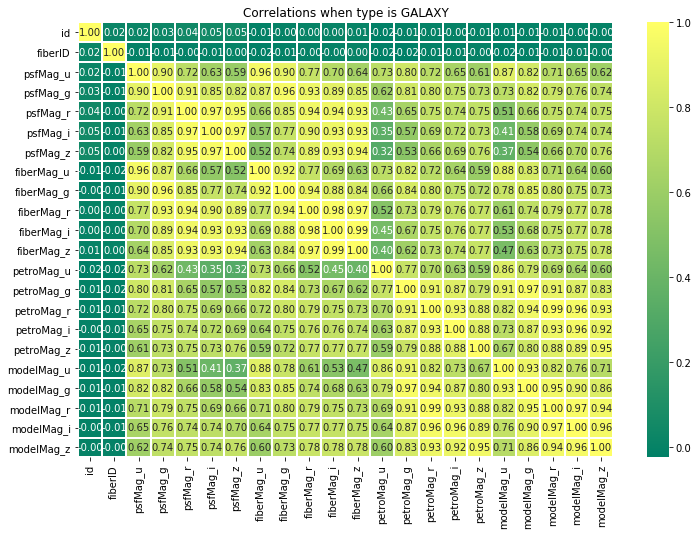

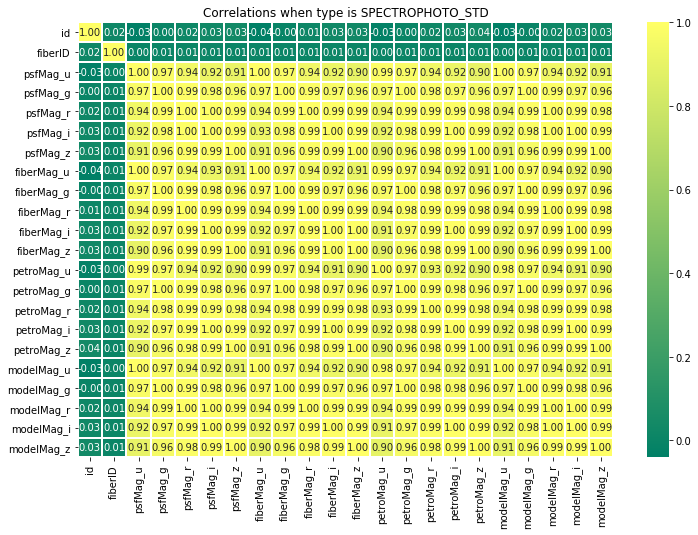

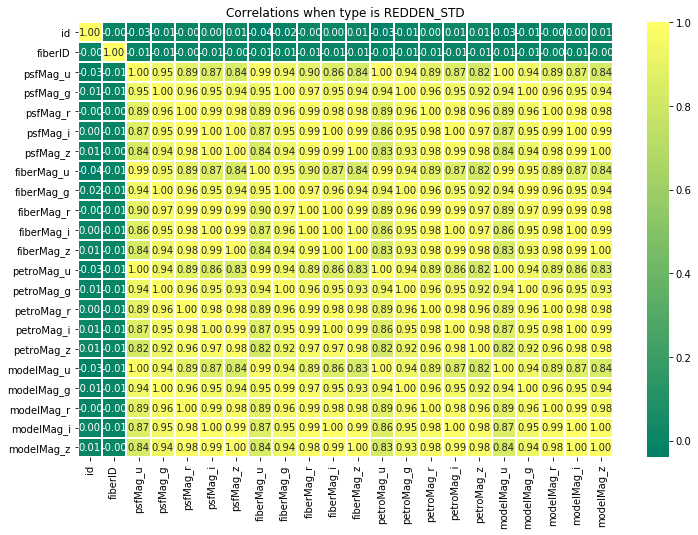

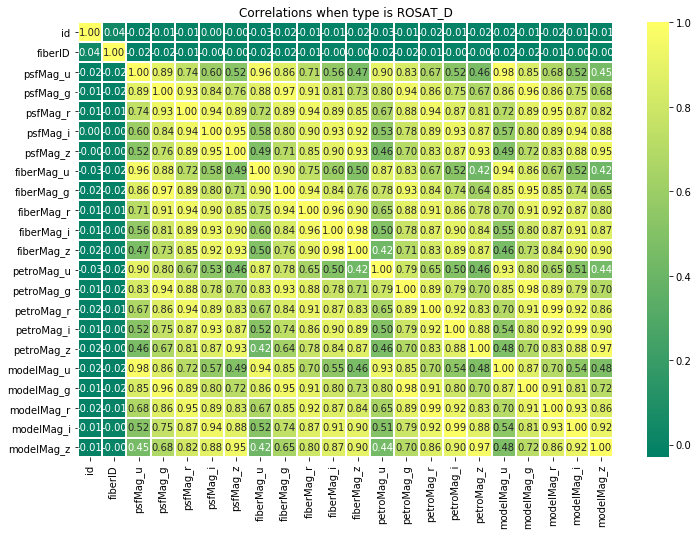

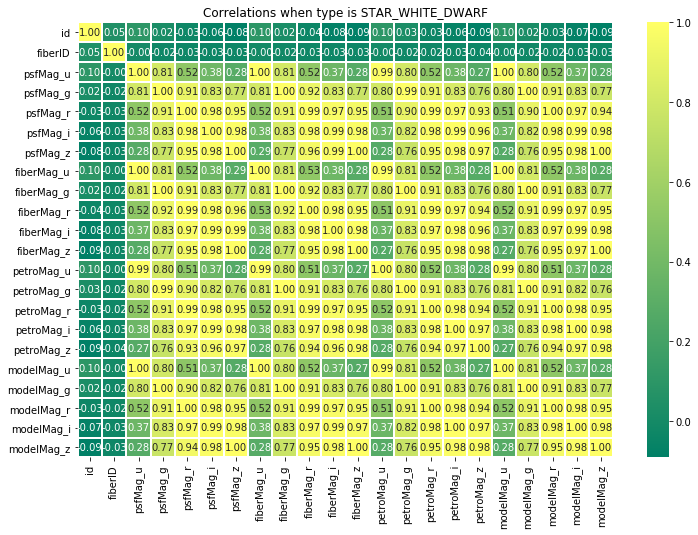

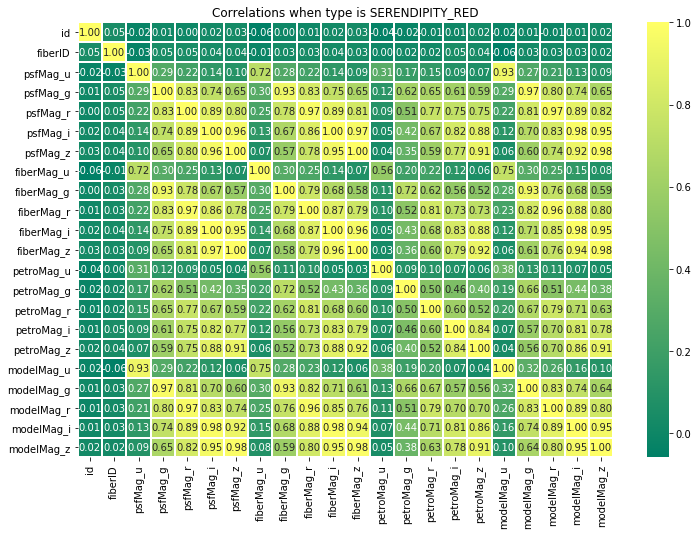

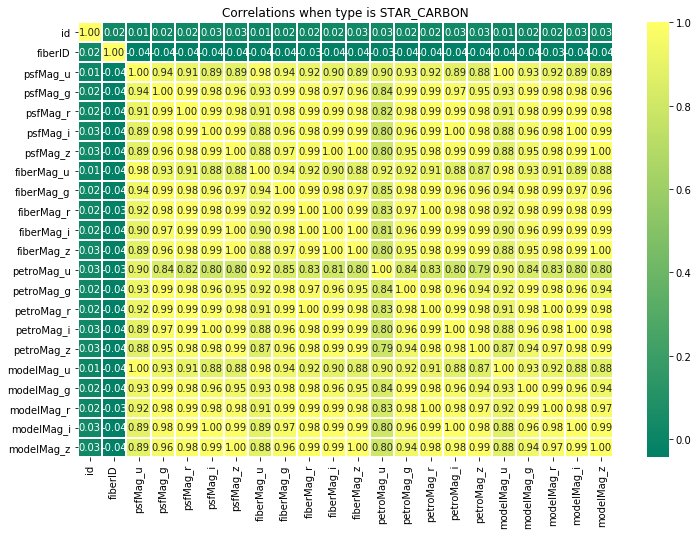

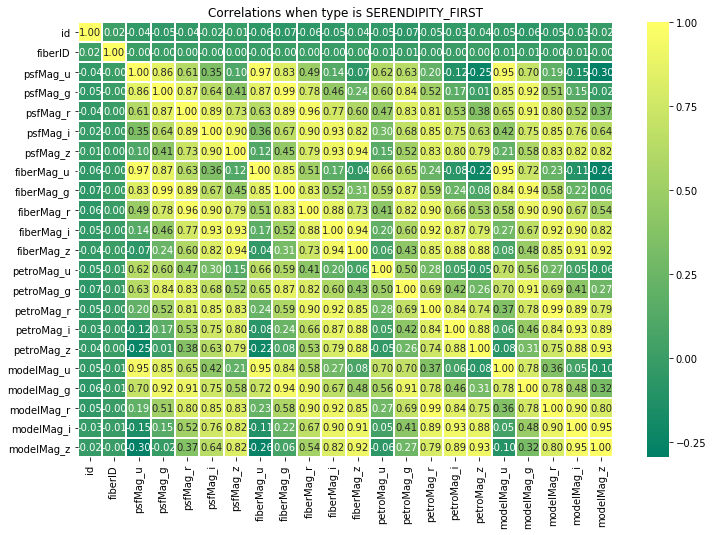

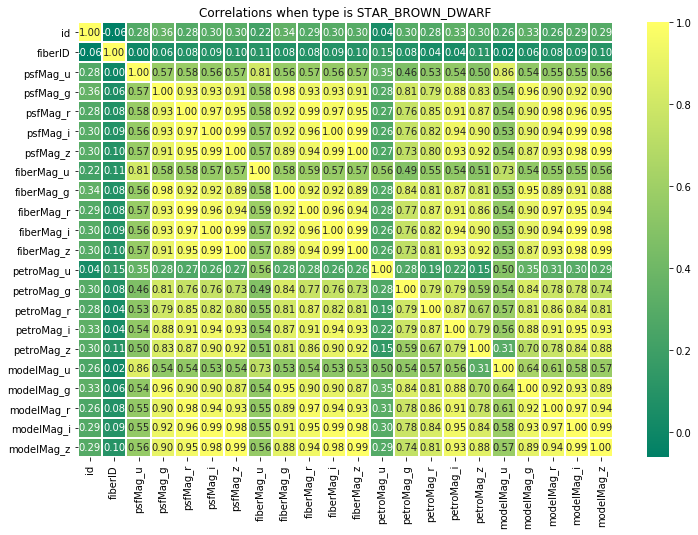

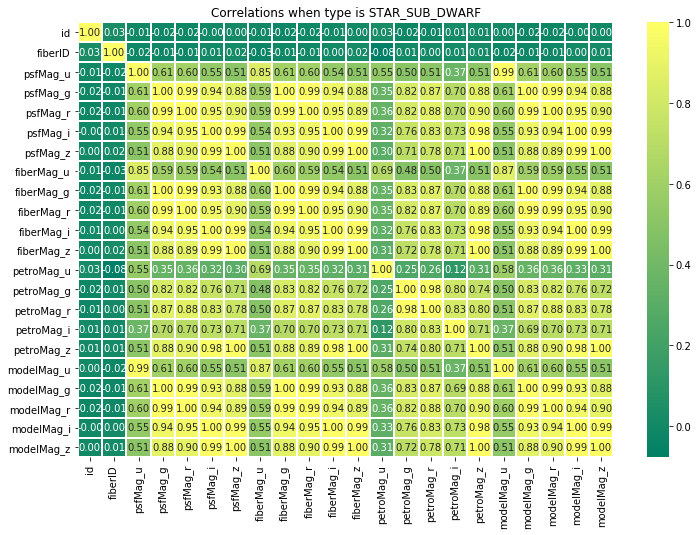

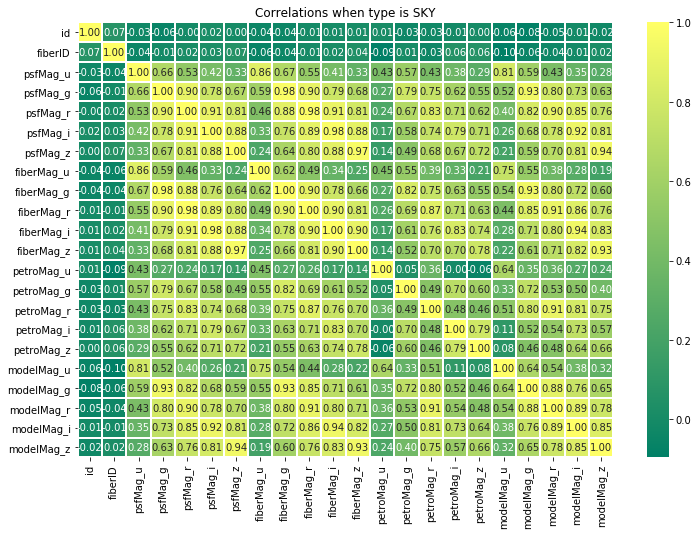

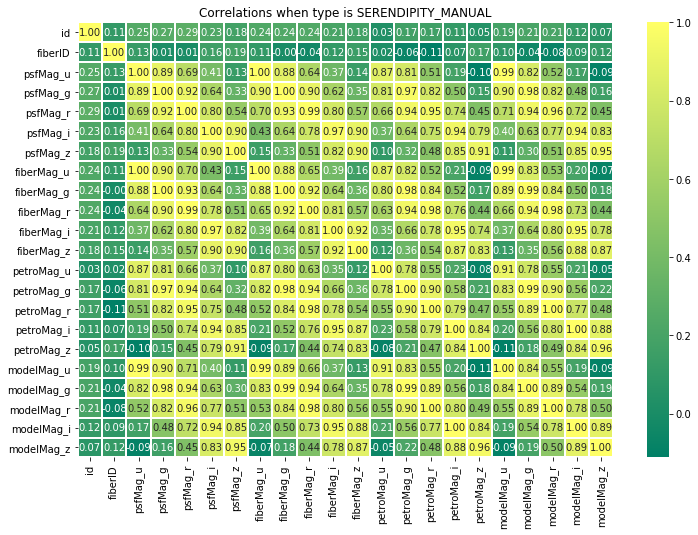

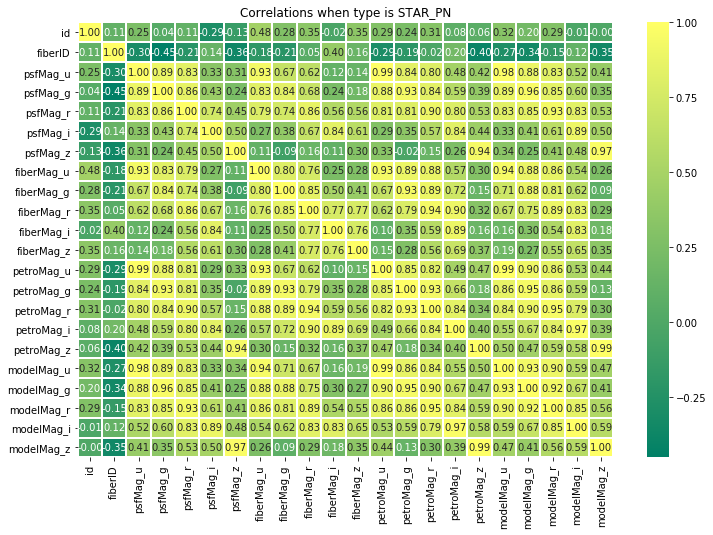

In [15]:
for x in types:    
    plt.figure(figsize=(12,8))
    ax =  sns.heatmap(df[df['type'] == x].corr(method='pearson'), annot = True,   
                fmt = '.2f',linewidths = 1, cmap="summer")
    buttom, top = ax.get_ylim()
    ax.set_ylim(buttom + 0.5, top - 0.5)
    plt.title("Correlations when type is %s"%x)

결과 
1. 전처리 작업이 하나도 되어있지 않았던 전 데이터 와는 달리 변수들간의 상관관계에서 유의미한 정보를 얻을 수 없었다
2. 확실한건 타입들간의 특징들이 가지는 상관관계는 차이가 있으며 이런부분이 학습이 잘되도록 할 수 있다면 좋은결과를 얻을 수 있을것 같다

### 천체타입별 변수의 아웃라이어에 해당되는 비율

#### std를 이용한 아웃라이어 확인

1. 아웃라이어를 선정할때 사분위 수가 아닌 표준편차를 이용하여 유의미한 차이를 나타내는 부분에서 부터 아웃라이어를 정한다
2. 아웃라이어가 정보를 가지고 있다는 것은 다음을 의미한다.
  * 특정 type과 아웃라이어의 상관관계가 깊다.
  * 특정 tpye은 아웃라이어에 전혀 영향이 없다.
  

평범한 정규 분포에서 

1. one Standard Deviation from the Mean: 68%
2. two Standard Deviations from the Mean: 95%
3. three Standard Deviations from the Mean: 99.7%

변수 별로 n standard deviations 을 아웃라이어 기준을 잡고
각 타입별로 아웃라이어 해당하는 비율이 어느정도 인지 파악해보자

In [17]:
def std_outlier(n, df) :
    '''
    param : # of std, df 
    return : dataframe of correltion of type&outlier 
    '''
    result = df.groupby("type").size().reset_index(name = "count")
    cols = df.columns[3:]
    for col in cols :
        mean = np.mean(df[col])
        std = np.std(df[col])
        temp = df[['type', col]]
        temp = temp[(temp[col] < (mean - n*std)) | (temp[col] > (mean + n*std))]
        new_col_name = "{}_Orate".format(col)
        temp = temp.groupby('type').size().reset_index(name=new_col_name)
        result = result.merge(temp, how="left", on="type")
        result = result.fillna(0)
        result[new_col_name] = result[new_col_name] / result["count"]
    return result

In [18]:
std_outlier(2,df)

type  count  psfMag_u_Orate  psfMag_g_Orate  \
0                GALAXY  34000        0.018353        0.005588   
1                   QSO  42500        0.037176        0.027718   
2            REDDEN_STD  13052        0.000153        0.000230   
3               ROSAT_D   5559        0.080590        0.062421   
4      SERENDIPITY_BLUE  19439        0.001235        0.001646   
5   SERENDIPITY_DISTANT   4163        0.021859        0.031227   
6     SERENDIPITY_FIRST   5718        0.073802        0.118923   
7    SERENDIPITY_MANUAL     46        0.195652        0.108696   
8       SERENDIPITY_RED   1312        0.285061        0.927591   
9                   SKY    170        0.176471        0.664706   
10     SPECTROPHOTO_STD  13073        0.018052        0.100513   
11             STAR_BHB  12069        0.040434        0.094788   
12     STAR_BROWN_DWARF    220        0.304545        0.859091   
13          STAR_CARBON   2875        0.012174        0.002435   
14        STAR_CATY_VAR   5808        0.000000        0.000172   
15              STAR_PN     12        0.000000        0.000000   
16       STAR_RED_DWARF   9040        0.223009        0.331305   
17       STAR_SUB_DWARF    977        0.068577        0.001024   
18     STAR_WHITE_DWARF   1932        0.020186        0.024327   

    psfMag_r_Orate  psfMag_i_Orate  psfMag_z_Orate  fiberMag_u_Orate  \
0         0.007324        0.010647        0.011235          0.012824   
1         0.021718        0.019812        0.015624          0.038682   
2         0.000230        0.000153        0.000153          0.000077   
3         0.057744        0.058824        0.058824          0.051448   
4         0.002161        0.009363        0.052112          0.000926   
5         0.020418        0.022340        0.089118          0.024261   
6         0.018538        0.002973        0.003148          0.066807   
7         0.086957        0.043478        0.043478          0.065217   
8         0.865091        0.004573        0.005335          0.313262   
9         0.700000        0.741176        0.682353          0.176471   
10        0.182896        0.173334        0.078865          0.030674   
11        0.091805        0.074986        0.044411          0.045488   
12        0.845455        0.027273        0.063636          0.340909   
13        0.040348        0.062609        0.054609          0.020522   
14        0.001894        0.094008        0.222280          0.000000   
15        0.000000        0.083333        0.250000          0.000000   
16        0.067367        0.007522        0.022566          0.256195   
17        0.002047        0.009212        0.022518          0.105425   
18        0.030021        0.031056        0.025880          0.023292   

    fiberMag_g_Orate  fiberMag_r_Orate  ...  petroMag_u_Orate  \
0           0.003882          0.007676  ...          0.042000   
1           0.028141          0.020753  ...          0.066212   
2           0.000230          0.000153  ...          0.000077   
3           0.048750          0.038316  ...          0.135276   
4           0.001595          0.001543  ...          0.000977   
5           0.030747          0.018016  ...          0.013212   
6           0.107730          0.005771  ...          0.132564   
7           0.086957          0.086957  ...          0.152174   
8           0.948933          0.887195  ...          0.420732   
9           0.670588          0.723529  ...          0.358824   
10          0.089115          0.147862  ...          0.001224   
11          0.090397          0.081200  ...          0.008369   
12          0.863636          0.850000  ...          0.404545   
13          0.001391          0.033739  ...          0.076522   
14          0.000172          0.001205  ...          0.000689   
15          0.000000          0.000000  ...          0.000000   
16          0.451770          0.128982  ...          0.355088   
17          0.002047          0.002047  ...          0.201638   
18          0.023810  

#### 데이터의 비율을 이용한 아웃라이어의 확인

In [21]:
# 비율을 이용한 tpye별 outlier 현황 


def rate_outlier(n, df) :
    '''
    param : n -> degree of outrate, df -> orb dataframe 
    return : dataframe of correltion of type&outlier 
    '''
    result = df.groupby("type").size().reset_index(name = "count")
    cols = df.columns[3:]
    for col in cols :
        Ql = df[col].quantile(n)
        Qr= df[col].quantile(1-n)
        IQR = Qr - Ql
        temp = df[['type', col]]
        temp = temp[ (temp[col] < (Ql - 1.5 * IQR)) | (temp[col] > (Qr + 1.5 * IQR))]
        new_col_name = "{}_Orate".format(col)
        temp = temp.groupby('type').size().reset_index(name=new_col_name)
        result = result.merge(temp, how="left", on="type")
        result = result.fillna(0)
        result[new_col_name] = result[new_col_name] / result["count"]
    return result

In [22]:
rate_outlier(0.25, df)

type  count  psfMag_u_Orate  psfMag_g_Orate  \
0                GALAXY  34000        0.001000        0.003912   
1                   QSO  42500        0.000376        0.015718   
2            REDDEN_STD  13052        0.000000        0.000230   
3               ROSAT_D   5559        0.001439        0.032380   
4      SERENDIPITY_BLUE  19439        0.000103        0.001080   
5   SERENDIPITY_DISTANT   4163        0.003363        0.018016   
6     SERENDIPITY_FIRST   5718        0.002623        0.054565   
7    SERENDIPITY_MANUAL     46        0.000000        0.086957   
8       SERENDIPITY_RED   1312        0.000000        0.895579   
9                   SKY    170        0.005882        0.541176   
10     SPECTROPHOTO_STD  13073        0.000000        0.004896   
11             STAR_BHB  12069        0.000249        0.048388   
12     STAR_BROWN_DWARF    220        0.004545        0.859091   
13          STAR_CARBON   2875        0.000000        0.002435   
14        STAR_CATY_VAR   5808        0.000000        0.000172   
15              STAR_PN     12        0.000000        0.000000   
16       STAR_RED_DWARF   9040        0.000000        0.160619   
17       STAR_SUB_DWARF    977        0.000000        0.001024   
18     STAR_WHITE_DWARF   1932        0.002070        0.014493   

    psfMag_r_Orate  psfMag_i_Orate  psfMag_z_Orate  fiberMag_u_Orate  \
0         0.002735        0.004000        0.004147          0.001794   
1         0.002282        0.002376        0.002471          0.006212   
2         0.000077        0.000077        0.000077          0.000000   
3         0.011333        0.012952        0.017449          0.009354   
4         0.000669        0.001338        0.002315          0.000154   
5         0.001681        0.001922        0.001681          0.006726   
6         0.000700        0.001049        0.000700          0.004197   
7         0.021739        0.000000        0.021739          0.000000   
8         0.498476        0.000762        0.001524          0.044207   
9         0.323529        0.394118        0.264706          0.023529   
10        0.002907        0.002524        0.001071          0.000153   
11        0.009943        0.005303        0.001491          0.001740   
12        0.686364        0.009091        0.027273          0.068182   
13        0.001739        0.003478        0.001739          0.001739   
14        0.000172        0.003960        0.022555          0.000000   
15        0.000000        0.000000        0.166667          0.000000   
16        0.016372        0.000221        0.003982          0.032633   
17        0.000000        0.001024        0.003071          0.012282   
18        0.009317        0.010352        0.007764          0.005694   

    fiberMag_g_Orate  fiberMag_r_Orate  ...  petroMag_u_Orate  \
0           0.002765          0.001588  ...          0.043382   
1           0.017718          0.001553  ...          0.075529   
2           0.000230          0.000000  ...          0.000077   
3           0.025544          0.003058  ...          0.152186   
4           0.001029          0.000412  ...          0.000823   
5           0.019217          0.001441  ...          0.011050   
6           0.056139          0.000525  ...          0.140958   
7           0.086957          0.043478  ...          0.152174   
8           0.919207          0.612805  ...          0.472561   
9           0.594118          0.370588  ...          0.376471   
10          0.007420          0.002065  ...          0.000841   
11          0.049797          0.006794  ...          0.003480   
12          0.859091          0.759091  ...          0.468182   
13          0.001043          0.000696  ...          0.088348   
14          0.000172          0.000000  ...          0.000861   
15          0.000000          0.000000  ...          0.000000   
16          0.303429          0.017810  ...          0.402212   
17          0.001024          0.000000  ...          0.241556   
18          0.016563  

#### 결과 :
 위 테이블들을 확인해 보면 아웃라이어의 분포가 고르다고 할 수 없다. 몇몇 타입의 천체들은 다른 타입의 천체들에 비해
아웃라이어의 비율이 상당히 높은 것을 나타난다.
이는 특히 type의 개수가 작은 천체들에서 나타나기 때문에 아웃라이어의 제거가 특정 type에 대한 데이터의 삭제라는 결과로 이어질 수 있다.


#### 의미 :  
 아웃라이어를 제거하는 것은 모델의 학습에 악영향을 미칠것이다. 하지만 너무 극단적인 아웃라이어나, 너무 정규화되지 않은 데이터들도 학습에 악영향을 미친다. 아웃라이어를 제거하면서, 데이터들을 정규화 하는 방법을 찾아야한다.

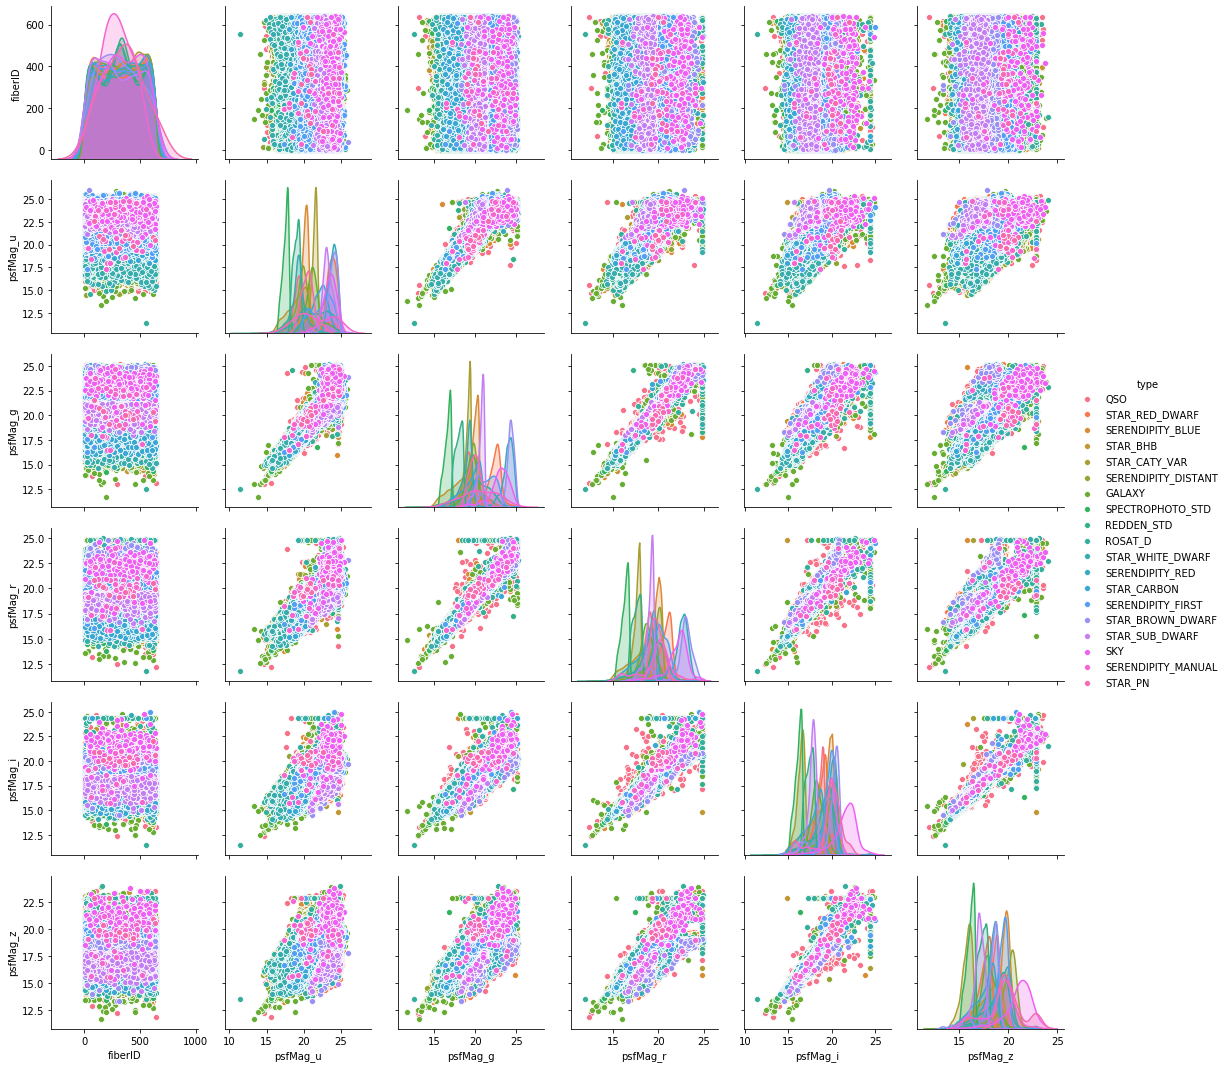

In [25]:
psfMag = df.iloc[:,1:8]
sns.pairplot(psfMag,hue='type')

#### uv 계열 비교

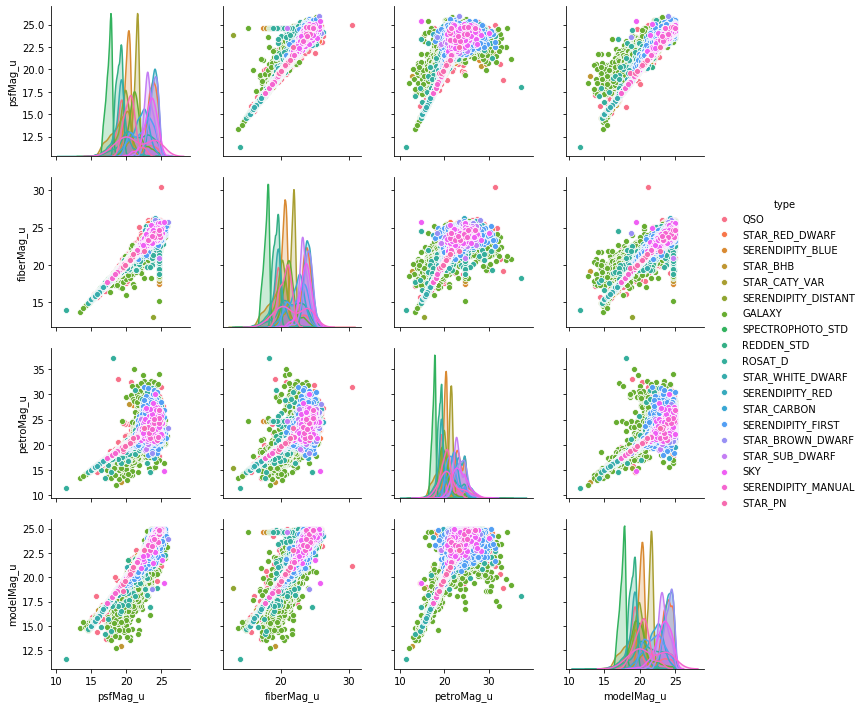

In [27]:
ultraviolet = df.loc[:,['type','psfMag_u','fiberMag_u','petroMag_u','modelMag_u']]
sns.pairplot(ultraviolet,hue='type')
#model_u를 제외하고는 다른 변수들의 값이 거의 같다는 것을 볼 수 있다.

#### radiowaves 비교

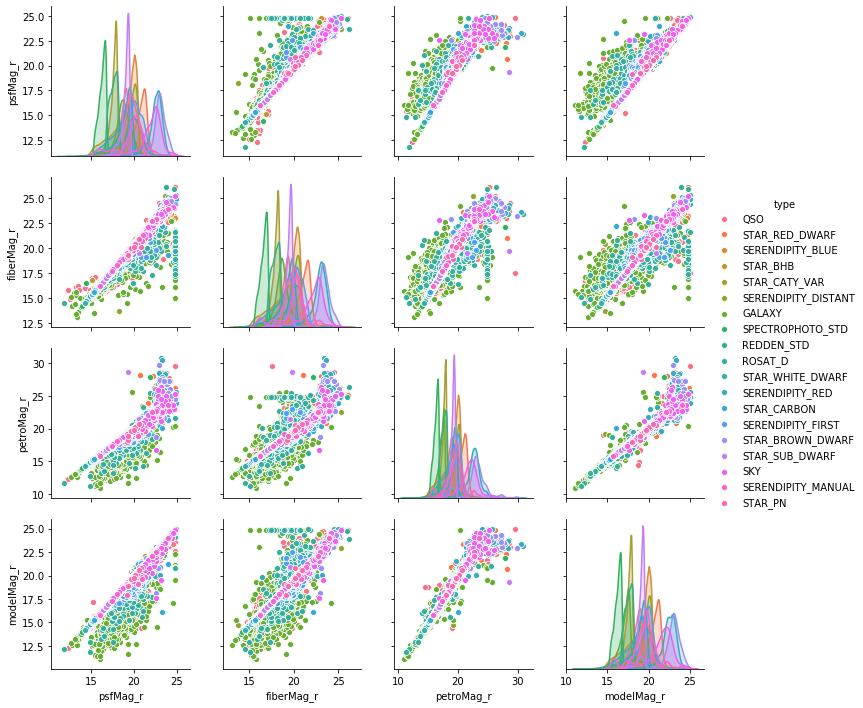

In [30]:
radiowaves = df.loc[:,['type','psfMag_r','fiberMag_r','petroMag_r','modelMag_r']]
sns.pairplot(radiowaves,hue='type')
#상대적으로 괜찮다. 산점도가 고르게 잘 퍼져있다.